In [2]:
import pandas as pd
import PyPDF2
%matplotlib inline

In [4]:
# reports_info.csv contains company name, year and link to each report
df_reports = pd.read_csv('reports_info.csv')
df=df_reports[["Company","Year"]].copy()
# Group by company name to see earliets, newest and amount of reports for each company
df_per_company=df.groupby(["Company"]).agg(['count','min','max']).reset_index()
df_per_company=df_per_company.droplevel(0, axis=1)
df_per_company = df_per_company.rename(columns={'': 'company','count': 'number_of_reports', 'min': 'olderst_report', 'max': 'newest_report'})


In [5]:
df_per_company.head(40)

,company,number_of_reports,olderst_report,newest_report
0,Adidas,15,2007,2022
1,Airbus,2,2020,2021
2,Allianz_Group,6,2017,2022
3,BMW,5,2017,2021
4,Bayer,13,2010,2022
5,Beiersdorf,11,2012,2022
6,Brenntag,7,2015,2021
7,Commerzbank,5,2017,2021
8,Continental,10,2012,2021
9,Covestro,5,2018,2022


<Axes: >

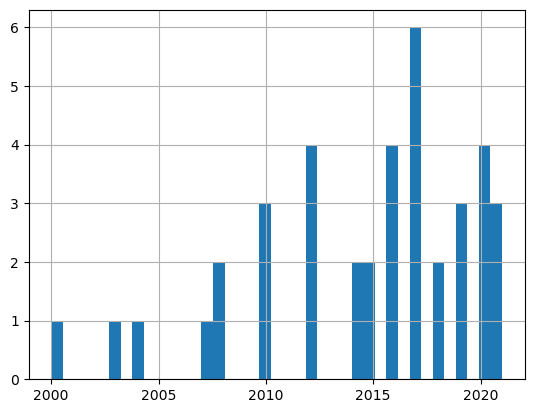

In [6]:
df_per_company.olderst_report.hist(bins=39)

Text(0, 0.5, 'number of companies publishing reports')

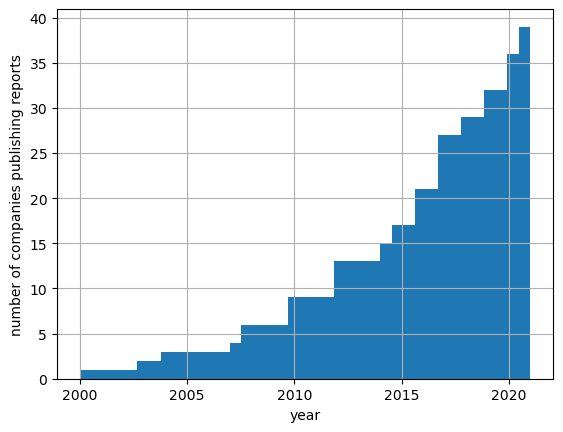

In [8]:
# How many companies are pulbishing sustanability reports by a given year
ax=df_per_company.olderst_report.hist(bins=39, cumulative=True)
ax.set_xlabel("year")
ax.set_ylabel("number of companies publishing reports")

In [10]:
# status 1 => reports succesfully read
# status 3 => non valid reports (screen shots or images)
# status 4 => duplicates (reports exits for same compay and same year), usualy corporate report where sustanability report exists
# status 5 => error due to high linespaces between lines resulting in each line being treated as a new paragraph
df_reports.groupby("status").count()

,Full report path,Company,Year
status,,,
1,287,287,287
3,11,11,11
4,7,7,7
5,11,11,11


# Only succesfully read reports

In [11]:
df_reports_used=df_reports[df_reports["status"]==1].reset_index(drop=True)

In [32]:
# use PyPDF2 to get number of pages for each reprot
num_pages=[]
for i in range(0,len(df_reports)):
    if df_reports.at[i,"status"]==1:
        pdfReader = PyPDF2.PdfReader("..\\reports\\"+df_reports.at[i,"Full report path"]) # "Full report path" is a column in the csv with the path to the report
        totalPages = len(pdfReader.pages)
        num_pages.append(totalPages)
    else: pass

ignore '/Perms' verify failed
ignore '/Perms' verify failed
ignore '/Perms' verify failed


In [33]:
df_reports_used["num_pages"]=num_pages
df_reports_used.groupby("Company").count()

,Full report path,Year,status,num_pages
Company,,,,
Adidas,15,15,15,15
Airbus,2,2,2,2
Allianz_Group,6,6,6,6
BMW,5,5,5,5
Bayer,13,13,13,13
Beiersdorf,11,11,11,11
Brenntag,7,7,7,7
Continental,10,10,10,10
Covestro,5,5,5,5


Text(0, 0.5, 'number of reports')

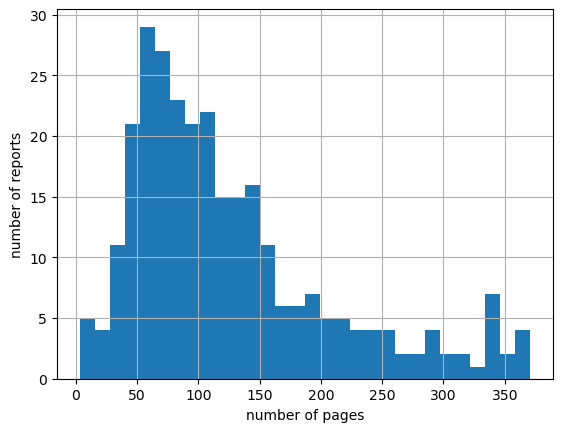

In [34]:
# number of pages from each company
ax=df_reports_used.num_pages.hist(bins=30)
ax.set_xlabel("number of pages")
ax.set_ylabel("number of reports")

In [35]:
df_reports_used.num_pages.mean()

125.39024390243902

In [36]:
df_reports_used.num_pages.median()

104.0